In [1]:
#11.Modeling (Sentiment Analysis) Machine Learning

In [2]:
import pandas as pd
from pathlib import Path

In [3]:
current_dir = Path.cwd()
data_path = current_dir / "Industrial_and_Scientific_5.json"

print("current_dir:", current_dir)
print("data_path:", data_path)

current_dir: /Users/rebecca/Documents/CROUSE/Winter-2025/COMP262-NLP_RS/Project/W25_COMP262_002_TeamGamma
data_path: /Users/rebecca/Documents/CROUSE/Winter-2025/COMP262-NLP_RS/Project/W25_COMP262_002_TeamGamma/Industrial_and_Scientific_5.json


In [4]:
#load data

dataset = pd.read_json(data_path,orient='records',lines=True)

In [5]:
pd.set_option('display.max_colwidth', None)

In [6]:
dataset.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"11 27, 2017",A1JB7HFWHRYHT7,B0000223SI,{'Size:': ' 1-(Pack)'},Alex W.,"This worked really well for what I used it for. So for my purposes it is getting full marks. This is an all around great, durable, and afforable sandpaper.\n\nPros:\n-Grit cuts really fast and evenly. No random deep scratches like I have seen in some cheaper paper\n-Didn't even have a hint of clogging up.\n-The adhesive is just what I needed. No permanent, but wasn't going anywhere.\n\nCons:\n-None",Couldn't have been happier with it's performance,1511740800,NaN,NaN
1,5,True,"11 4, 2017",A2FCLJG5GV8SD6,B0000223SI,{'Size:': ' 1-(Pack)'},Randall Harris,Fast cutting and good adheasive.,Good paper.,1509753600,NaN,NaN
2,5,False,"10 27, 2017",A3IT9B33NWYQSL,B0000223SI,{'Size:': ' 1-(Pack)'},A. C.,"Worked great for my lapping bench. I would like it if the adhesive were backed with waxed paper for storage and keeping the grit out, but all but the first 6 inches or so still functioned when it arrived. I used rubber cement to remedy that.",Handy!,1509062400,NaN,NaN
3,4,True,"01 13, 2018",AUL5LCV4TT73P,B0000223SK,{'Size:': ' 1-Pack'},TnT,As advertised,As advertised,1515801600,NaN,NaN
4,5,True,"10 7, 2017",A1V3I3L5JKO7TM,B0000223SK,{'Size:': ' 1-Pack'},John Jones,seems like a pretty good value as opposed to buying it at the big box stores by the sheet.,seems like a pretty good value as opposed to buying it ...,1507334400,NaN,NaN


In [7]:
dataset.describe()

,overall,unixReviewTime
count,77071.000000,7.707100e+04
mean,4.524062,1.454857e+09
std,0.949668,4.559407e+07
min,1.000000,1.051402e+09
25%,4.000000,1.427674e+09
50%,5.000000,1.459469e+09
75%,5.000000,1.486944e+09
max,5.000000,1.538093e+09


In [8]:
dataset.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77071 entries, 0 to 77070
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         77071 non-null  int64 
 1   verified        77071 non-null  bool  
 2   reviewTime      77071 non-null  object
 3   reviewerID      77071 non-null  object
 4   asin            77071 non-null  object
 5   style           36037 non-null  object
 6   reviewerName    77044 non-null  object
 7   reviewText      77060 non-null  object
 8   summary         77061 non-null  object
 9   unixReviewTime  77071 non-null  int64 
 10  vote            9620 non-null   object
 11  image           1719 non-null   object
dtypes: bool(1), int64(2), object(9)
memory usage: 6.5+ MB


In [9]:
#drop null column of reviewText
data_reviewText_without_nan = dataset.dropna(subset=['reviewText'])

In [10]:
data_reviewText_without_nan.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 77060 entries, 0 to 77070
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         77060 non-null  int64 
 1   verified        77060 non-null  bool  
 2   reviewTime      77060 non-null  object
 3   reviewerID      77060 non-null  object
 4   asin            77060 non-null  object
 5   style           36028 non-null  object
 6   reviewerName    77033 non-null  object
 7   reviewText      77060 non-null  object
 8   summary         77057 non-null  object
 9   unixReviewTime  77060 non-null  int64 
 10  vote            9620 non-null   object
 11  image           1719 non-null   object
dtypes: bool(1), int64(2), object(9)
memory usage: 7.1+ MB


In [11]:
num_across_products = data_reviewText_without_nan['asin'].value_counts()

In [12]:
num_across_products.head(10)

asin
B0013BKDO8    1227
B00DRALJ28     909
B0001MSC84     650
B000EJUBBU     305
B001766LZO     241
B000ZTEPWU     210
B0002EQU6C     205
B00837ZGRY     204
B00DMI632G     203
B001769IRW     191
Name: count, dtype: int64

In [13]:
# check how many products in dataset
len(num_across_products)

5334

In [14]:
max(num_across_products.values)

1227

In [15]:
min(num_across_products.values)

1

In [16]:
# Check for duplicates
from collections import Counter
duplicated_bool_p_r_ID_o_n_rt_urt = data_reviewText_without_nan.duplicated(subset=['reviewText','asin','reviewerID','overall','reviewerName','reviewTime','unixReviewTime'], keep='first')

Counter(duplicated_bool_p_r_ID_o_n_rt_urt)

Counter({False: 72692, True: 4368})

In [17]:
#keep first
data_unique = data_reviewText_without_nan.drop_duplicates(
    subset=['reviewText', 'asin', 'reviewerID', 'overall', 'reviewerName', 'reviewTime', 'unixReviewTime'],
    keep='first'
)

print(data_unique.shape)

(72692, 12)


In [18]:
data_unique.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 72692 entries, 0 to 77070
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         72692 non-null  int64 
 1   verified        72692 non-null  bool  
 2   reviewTime      72692 non-null  object
 3   reviewerID      72692 non-null  object
 4   asin            72692 non-null  object
 5   style           33655 non-null  object
 6   reviewerName    72665 non-null  object
 7   reviewText      72692 non-null  object
 8   summary         72689 non-null  object
 9   unixReviewTime  72692 non-null  int64 
 10  vote            9085 non-null   object
 11  image           1657 non-null   object
dtypes: bool(1), int64(2), object(9)
memory usage: 6.7+ MB


In [19]:
# remove product has only 1 review
product_review_counts = data_unique['asin'].value_counts()
valid_products = product_review_counts[product_review_counts > 1].index
data = data_unique[data_unique['asin'].isin(valid_products)]

In [20]:
data.shape

(72618, 12)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72618 entries, 0 to 77070
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         72618 non-null  int64 
 1   verified        72618 non-null  bool  
 2   reviewTime      72618 non-null  object
 3   reviewerID      72618 non-null  object
 4   asin            72618 non-null  object
 5   style           33631 non-null  object
 6   reviewerName    72591 non-null  object
 7   reviewText      72618 non-null  object
 8   summary         72615 non-null  object
 9   unixReviewTime  72618 non-null  int64 
 10  vote            9067 non-null   object
 11  image           1656 non-null   object
dtypes: bool(1), int64(2), object(9)
memory usage: 6.7+ MB


In [22]:
#replace "" with nan in summary column

data['summary'] = data['summary'].fillna('').astype(str)

/var/folders/60/83kzkx2x4hs5zc8lx2tyc8lw0000gn/T/ipykernel_44987/1515914394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['summary'] = data['summary'].fillna('').astype(str)


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72618 entries, 0 to 77070
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         72618 non-null  int64 
 1   verified        72618 non-null  bool  
 2   reviewTime      72618 non-null  object
 3   reviewerID      72618 non-null  object
 4   asin            72618 non-null  object
 5   style           33631 non-null  object
 6   reviewerName    72591 non-null  object
 7   reviewText      72618 non-null  object
 8   summary         72618 non-null  object
 9   unixReviewTime  72618 non-null  int64 
 10  vote            9067 non-null   object
 11  image           1656 non-null   object
dtypes: bool(1), int64(2), object(9)
memory usage: 6.7+ MB


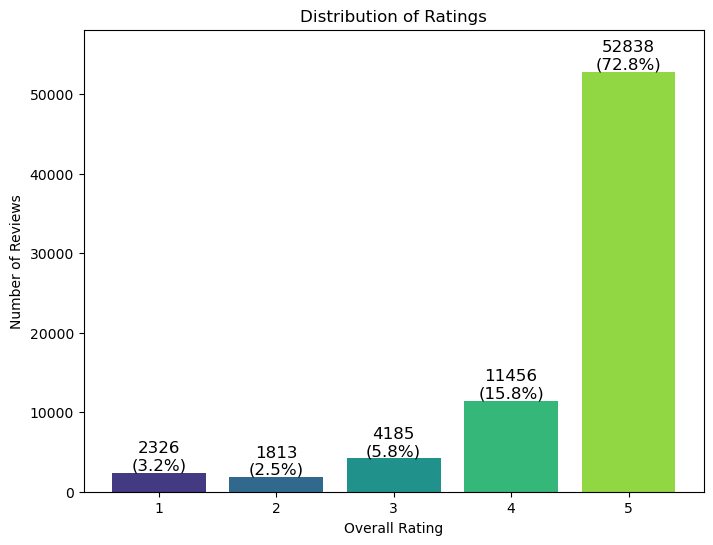

Ratings Distribution:
overall
1     2326
2     1813
3     4185
4    11456
5    52838
Name: count, dtype: int64


In [24]:
from matplotlib import pyplot as plt
import seaborn as sns

rating_counts = data['overall'].value_counts().sort_index()
total_reviews = rating_counts.sum()

colors = sns.color_palette("viridis", len(rating_counts))

plt.figure(figsize=(8,6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.xlabel("Overall Rating")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Ratings")
plt.ylim(0, rating_counts.max() * 1.1)

for bar in bars:
    height = bar.get_height()
    percentage = (height / total_reviews) * 100
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height}\n({percentage:.1f}%)",
             ha='center', va='bottom', fontsize=12)

plt.show()

print("Ratings Distribution:")
print(rating_counts)

In [25]:
# We map ratings 1 and 2 to NEGATIVE (0), 3 to NEUTRAL (1), and 4 and 5 to POSITIVE (2).
sentiment_score = {1: 0,
                   2: 0,
                   3: 1,
                   4: 2,
                   5: 2}
sentiment = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}

In [26]:
data['overall'] = data['overall'].astype(int)
data['sentiment_score'] = data['overall'].map(sentiment_score)
data['label'] = data['sentiment_score'].map(sentiment)

/var/folders/60/83kzkx2x4hs5zc8lx2tyc8lw0000gn/T/ipykernel_44987/1679437791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['overall'] = data['overall'].astype(int)
/var/folders/60/83kzkx2x4hs5zc8lx2tyc8lw0000gn/T/ipykernel_44987/1679437791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment_score'] = data['overall'].map(sentiment_score)
/var/folders/60/83kzkx2x4hs5zc8lx2tyc8lw0000gn/T/ipykernel_44987/1679437791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [27]:
data.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,sentiment_score,label
0,5,True,"11 27, 2017",A1JB7HFWHRYHT7,B0000223SI,{'Size:': ' 1-(Pack)'},Alex W.,"This worked really well for what I used it for. So for my purposes it is getting full marks. This is an all around great, durable, and afforable sandpaper.\n\nPros:\n-Grit cuts really fast and evenly. No random deep scratches like I have seen in some cheaper paper\n-Didn't even have a hint of clogging up.\n-The adhesive is just what I needed. No permanent, but wasn't going anywhere.\n\nCons:\n-None",Couldn't have been happier with it's performance,1511740800,NaN,NaN,2,POSITIVE
1,5,True,"11 4, 2017",A2FCLJG5GV8SD6,B0000223SI,{'Size:': ' 1-(Pack)'},Randall Harris,Fast cutting and good adheasive.,Good paper.,1509753600,NaN,NaN,2,POSITIVE
2,5,False,"10 27, 2017",A3IT9B33NWYQSL,B0000223SI,{'Size:': ' 1-(Pack)'},A. C.,"Worked great for my lapping bench. I would like it if the adhesive were backed with waxed paper for storage and keeping the grit out, but all but the first 6 inches or so still functioned when it arrived. I used rubber cement to remedy that.",Handy!,1509062400,NaN,NaN,2,POSITIVE
3,4,True,"01 13, 2018",AUL5LCV4TT73P,B0000223SK,{'Size:': ' 1-Pack'},TnT,As advertised,As advertised,1515801600,NaN,NaN,2,POSITIVE
4,5,True,"10 7, 2017",A1V3I3L5JKO7TM,B0000223SK,{'Size:': ' 1-Pack'},John Jones,seems like a pretty good value as opposed to buying it at the big box stores by the sheet.,seems like a pretty good value as opposed to buying it ...,1507334400,NaN,NaN,2,POSITIVE


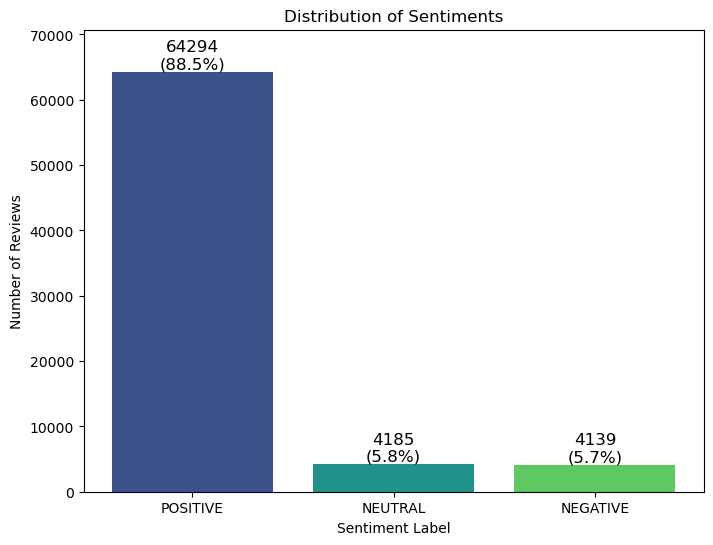

Sentiment Distribution:
label
POSITIVE    64294
NEUTRAL      4185
NEGATIVE     4139
Name: count, dtype: int64


In [28]:
rating_counts = data['label'].value_counts()

total_reviews = rating_counts.sum()

colors = sns.color_palette("viridis", len(rating_counts))

plt.figure(figsize=(8,6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)

plt.xlabel("Sentiment Label")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Sentiments")
plt.ylim(0, rating_counts.max() * 1.1)

for bar in bars:
    height = bar.get_height()
    percentage = (height / total_reviews) * 100
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height}\n({percentage:.1f}%)",
             ha='center', va='bottom', fontsize=12)

plt.show()

print("Sentiment Distribution:")
print(rating_counts)

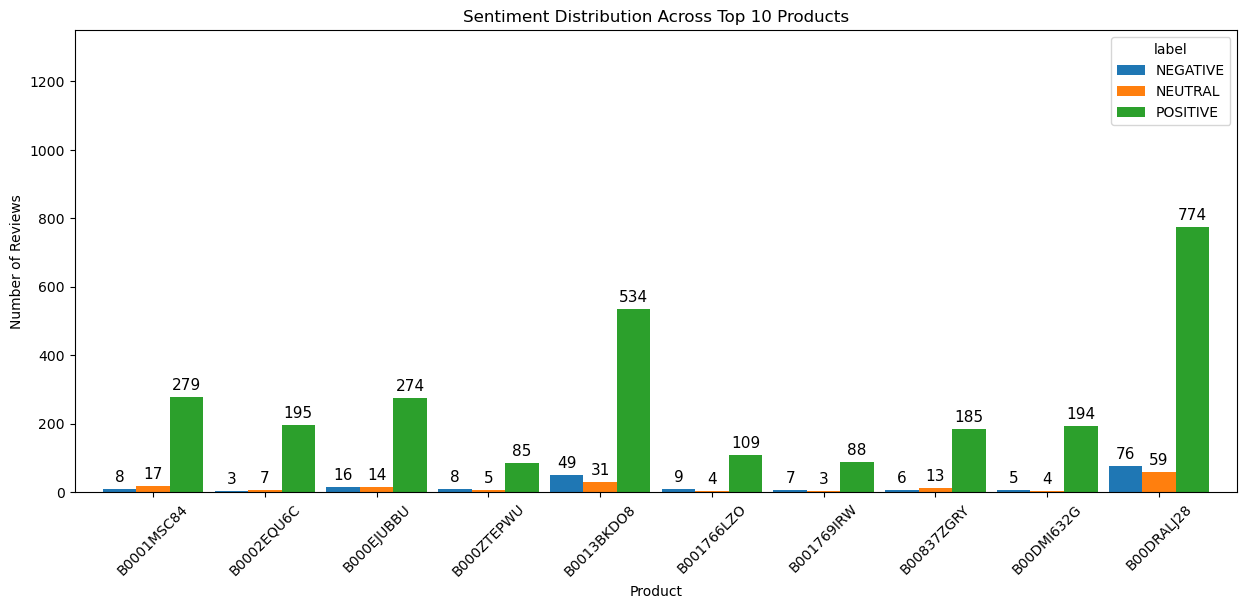

In [29]:
# Get the top 10 products based on the number of reviews (asin)
top_10_products = num_across_products.nlargest(10).index
data_top_10 = data[data['asin'].isin(top_10_products)]

# Count sentiments per product (asin) for the top 10 products
sentiment_counts = data_top_10.groupby(['asin', 'label']).size().unstack(fill_value=0)

# Plotting the sentiment distribution for the top 10 products
ax = sentiment_counts.plot(kind='bar', stacked=False, figsize=(15,6), width=0.9)
plt.title('Sentiment Distribution Across Top 10 Products')
plt.xlabel('Product')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11, padding=3)
plt.ylim(0, num_across_products.max() * 1.1)
plt.show()

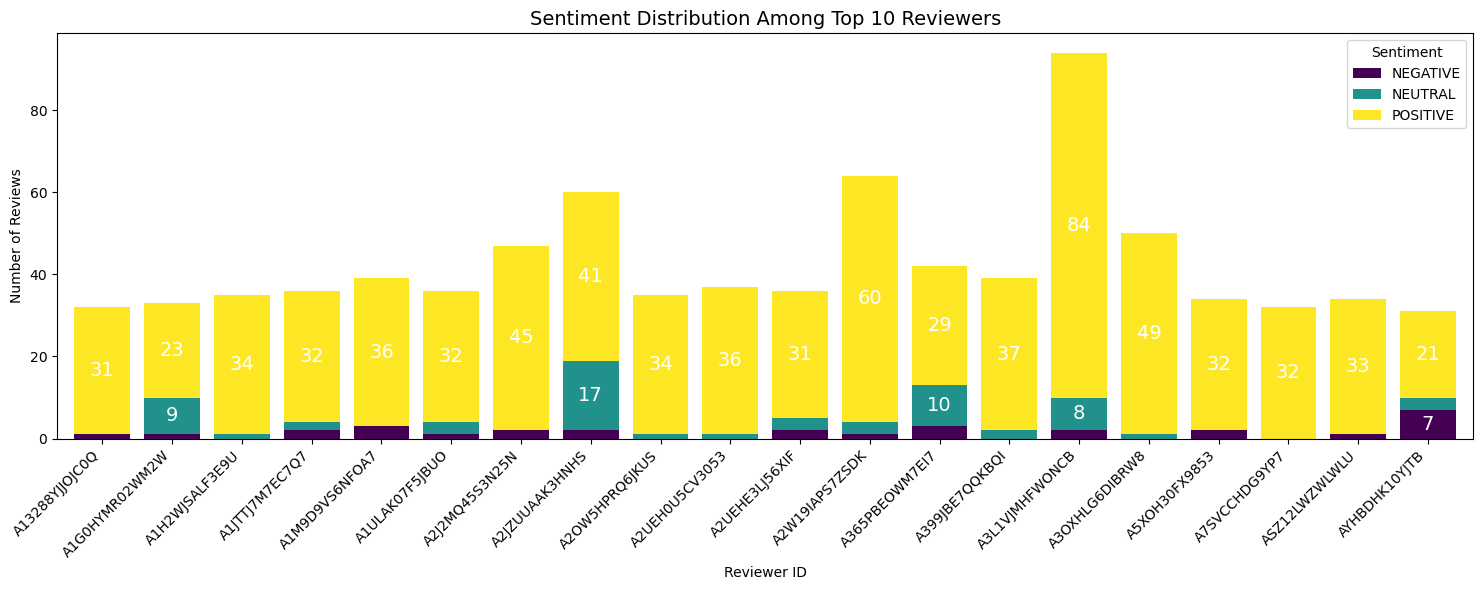

In [30]:
num_reviews_user = data['reviewerID'].value_counts()

top_20_users = num_reviews_user.nlargest(20).index

data_top_users = data[data['reviewerID'].isin(top_20_users)]

sentiment_counts = data_top_users.groupby(['reviewerID', 'label']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(15,6))
sentiment_counts.plot(kind='bar', stacked=True, ax=ax, width=0.8, colormap='viridis')

plt.title("Sentiment Distribution Among Top 10 Reviewers", fontsize=14)
plt.xlabel("Reviewer ID")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45, ha='right')

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 3:
            ax.text(bar.get_x() + bar.get_width()/2,
                    bar.get_y() + height / 2,
                    f"{int(height)}", ha='center', va='center', fontsize=14, color='white')

plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

In [31]:
# length
data['reviewText_length_words'] = data['reviewText'].apply(lambda x: len(str(x).split()))
correlation = data['reviewText_length_words'].corr(data['overall'])
print(f"\nCorrelation between review length and rating: {correlation:.2f}")


Correlation between review length and rating: -0.11


/var/folders/60/83kzkx2x4hs5zc8lx2tyc8lw0000gn/T/ipykernel_44987/2626919657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviewText_length_words'] = data['reviewText'].apply(lambda x: len(str(x).split()))


/var/folders/60/83kzkx2x4hs5zc8lx2tyc8lw0000gn/T/ipykernel_44987/937189411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = pd.cut(data['overall'],


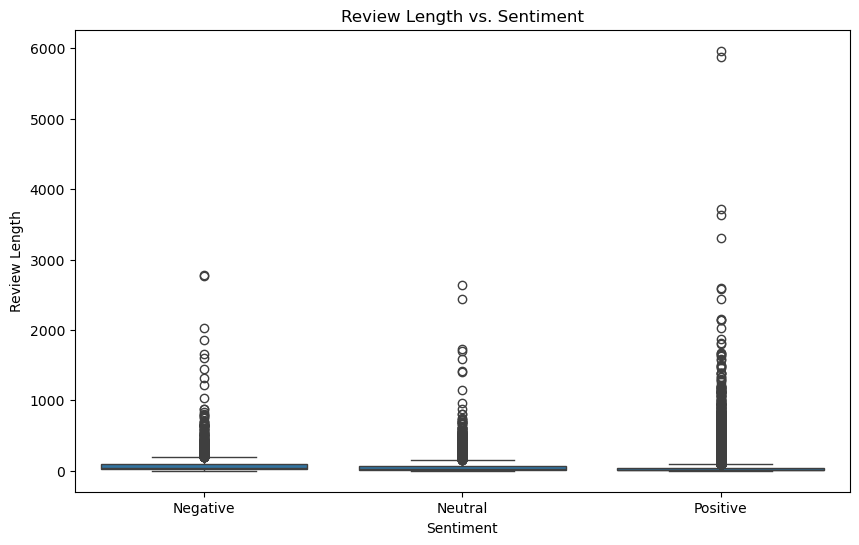

In [32]:
import numpy as np

data['sentiment'] = pd.cut(data['overall'],
                         bins=[-np.inf, 2, 3, np.inf],
                         labels=['Negative', 'Neutral', 'Positive'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='reviewText_length_words', data=data)
plt.title('Review Length vs. Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()

In [33]:
Q1 = data['reviewText_length_words'].quantile(0.25)
Q3 = data['reviewText_length_words'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data['reviewText_length_words'][(data['reviewText_length_words'] < lower_bound) | (data['reviewText_length_words'] > upper_bound)]
print(f"Number of outliers in review length: {len(outliers)}")

Number of outliers in review length: 7000


In [34]:
# Remove outliers
filtered_data = data[(data['reviewText_length_words'] >= lower_bound) & 
                     (data['reviewText_length_words'] <= upper_bound)]

filtered_data = filtered_data[['reviewText', 'summary', 'label']]

print(f"Filtered data shape: {filtered_data.shape}")

Filtered data shape: (65618, 3)


In [35]:
filtered_data.head()

,reviewText,summary,label
0,"This worked really well for what I used it for. So for my purposes it is getting full marks. This is an all around great, durable, and afforable sandpaper.\n\nPros:\n-Grit cuts really fast and evenly. No random deep scratches like I have seen in some cheaper paper\n-Didn't even have a hint of clogging up.\n-The adhesive is just what I needed. No permanent, but wasn't going anywhere.\n\nCons:\n-None",Couldn't have been happier with it's performance,POSITIVE
1,Fast cutting and good adheasive.,Good paper.,POSITIVE
2,"Worked great for my lapping bench. I would like it if the adhesive were backed with waxed paper for storage and keeping the grit out, but all but the first 6 inches or so still functioned when it arrived. I used rubber cement to remedy that.",Handy!,POSITIVE
3,As advertised,As advertised,POSITIVE
4,seems like a pretty good value as opposed to buying it at the big box stores by the sheet.,seems like a pretty good value as opposed to buying it ...,POSITIVE


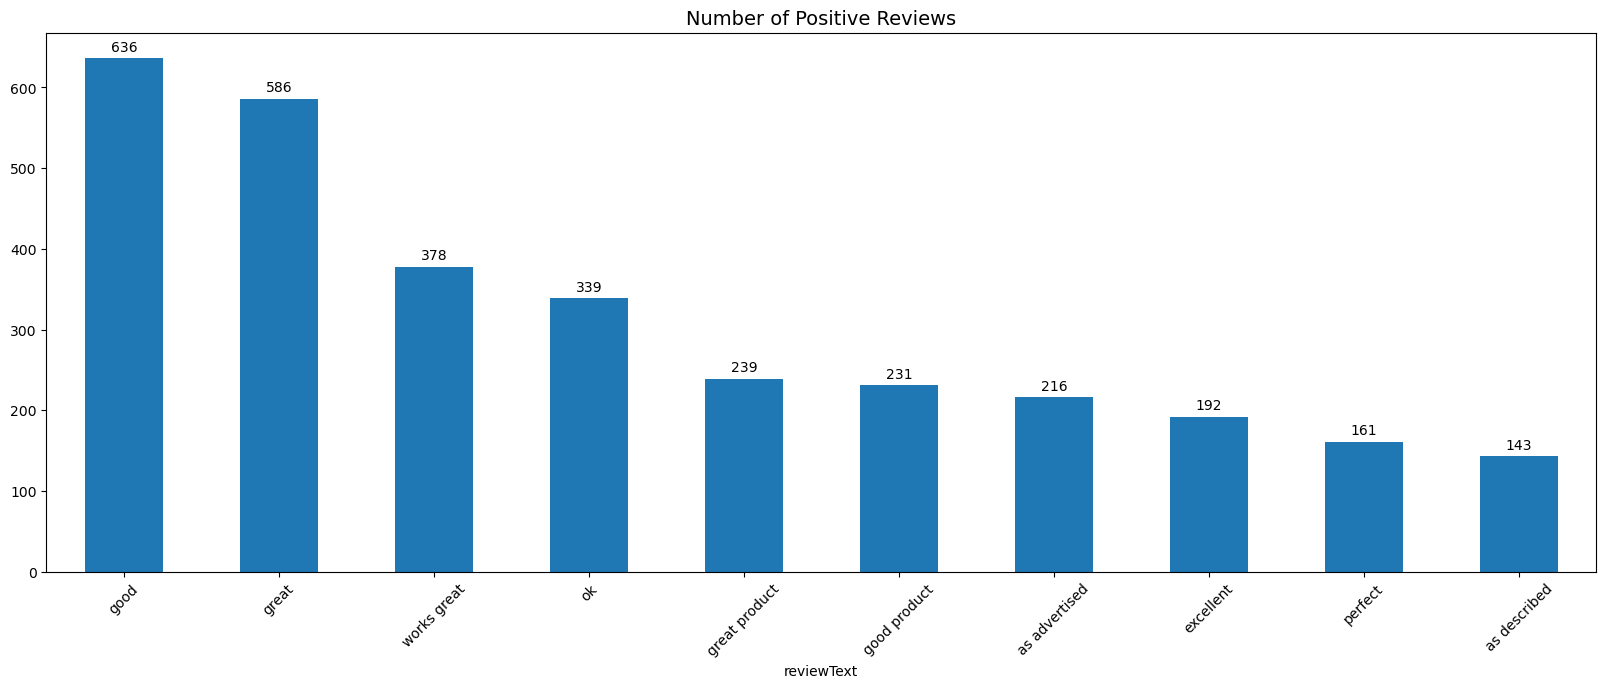

In [36]:
positive_review_counts = filtered_data[filtered_data['label'] == 'POSITIVE']['reviewText'].str.lower().value_counts().head(10)

fig, ax = plt.subplots(figsize=(20, 7))
bars = positive_review_counts.plot(kind='bar', ax=ax)

plt.title('Number of Positive Reviews', fontsize=14)
plt.xticks(rotation=45)
ax.bar_label(bars.containers[0], fmt='%d', label_type='edge', fontsize=10, padding=3)
plt.show()

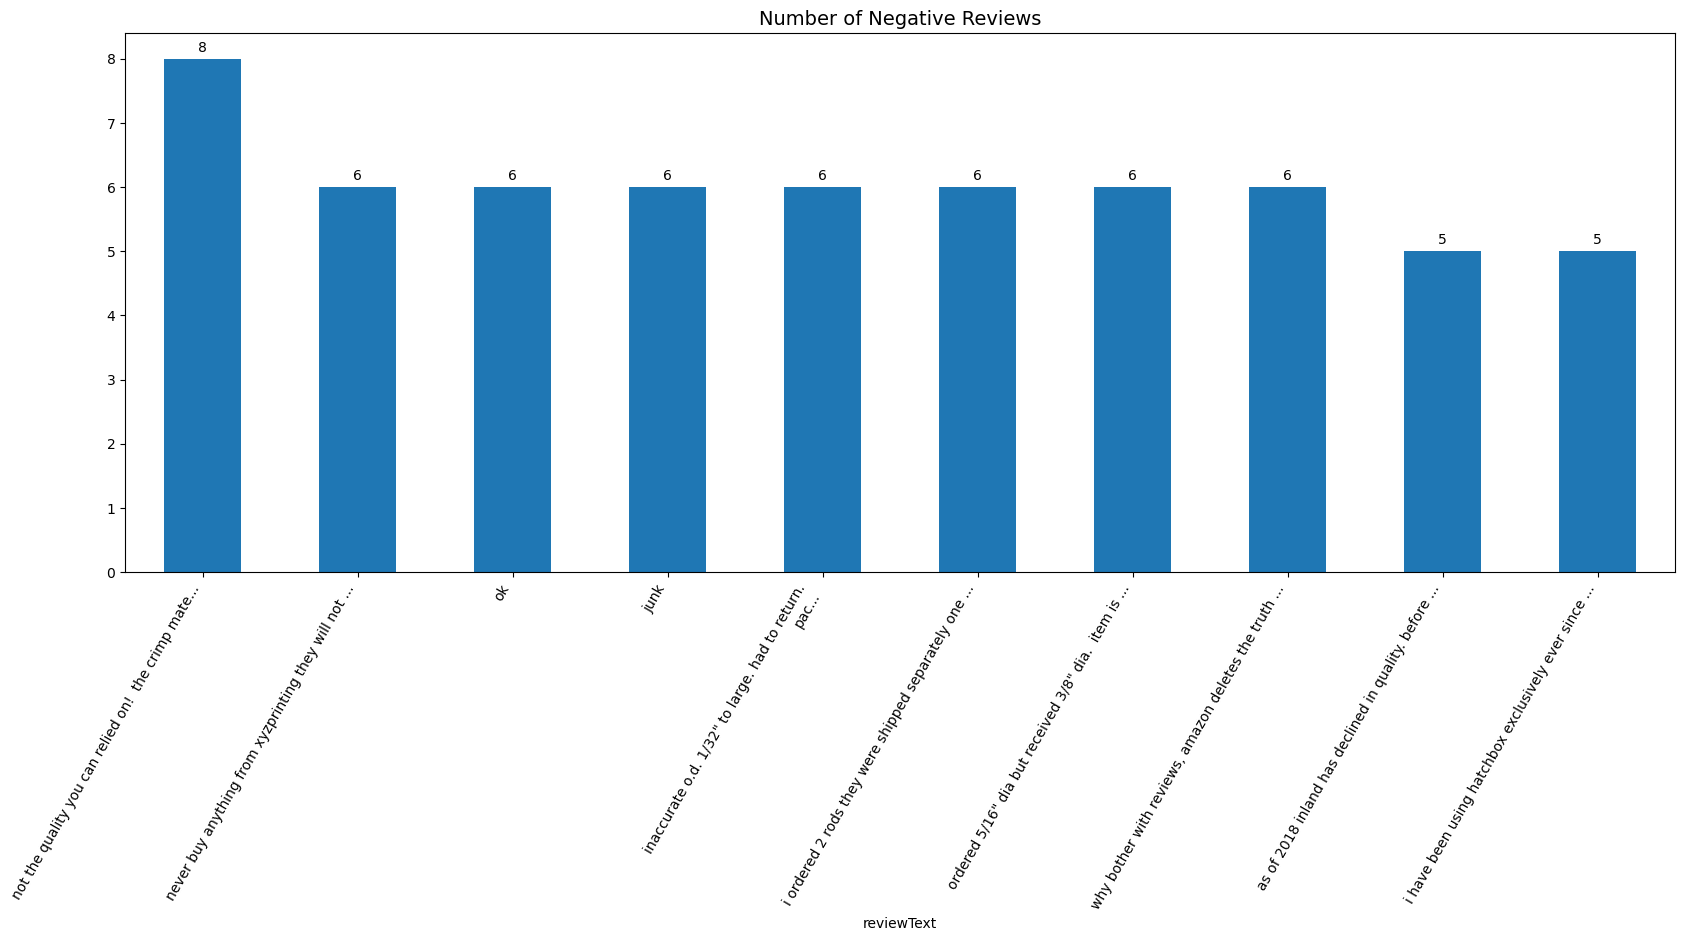

In [37]:
negative_review_counts = data[data['label'] == 'NEGATIVE']['reviewText'].str.lower().value_counts().head(10)

short_labels = [text[:50] + "..." if len(text) > 50 else text for text in negative_review_counts.index]

fig, ax = plt.subplots(figsize=(20, 7))
bars = negative_review_counts.plot(kind='bar', ax=ax)

plt.title('Number of Negative Reviews', fontsize=14)
plt.xticks(range(len(short_labels)), short_labels, rotation=60, ha='right')
ax.bar_label(bars.containers[0], fmt='%d', label_type='edge', fontsize=10, padding=3)
plt.show()

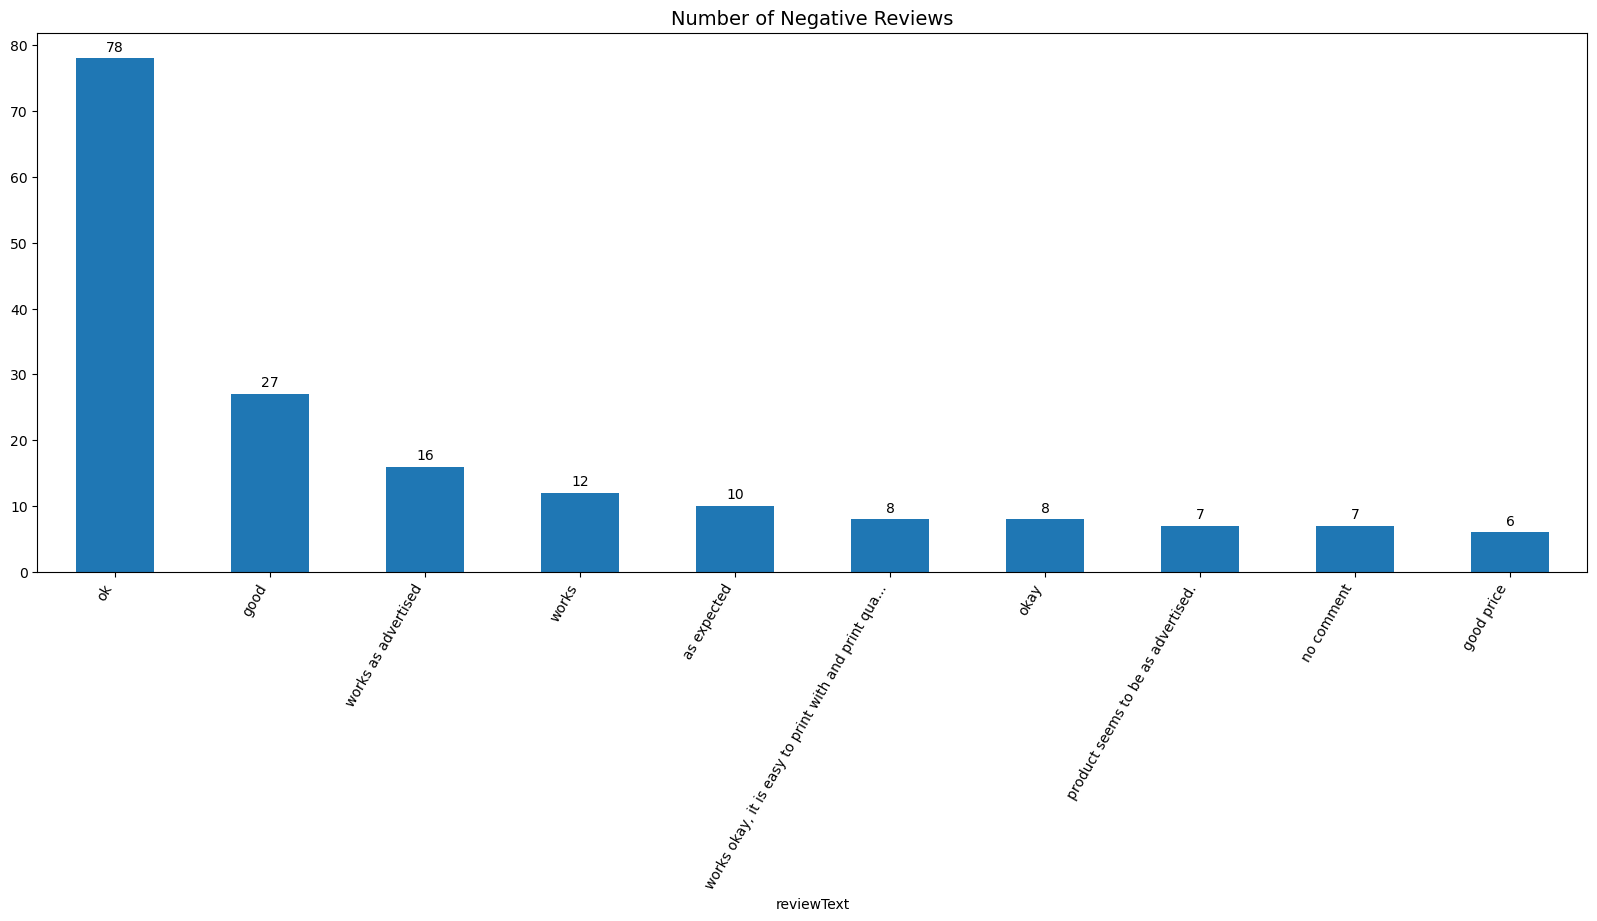

In [38]:
neutral_review_counts = data[data['label'] == 'NEUTRAL']['reviewText'].str.lower().value_counts().head(10)

short_labels = [text[:50] + "..." if len(text) > 50 else text for text in neutral_review_counts.index]

fig, ax = plt.subplots(figsize=(20, 7))
bars = neutral_review_counts.plot(kind='bar', ax=ax)

plt.title('Number of Negative Reviews', fontsize=14)
plt.xticks(range(len(short_labels)), short_labels, rotation=60, ha='right')
ax.bar_label(bars.containers[0], fmt='%d', label_type='edge', fontsize=10, padding=3)
plt.show()

In [39]:
# preprocessing

filtered_data['summary'] = filtered_data['summary'].fillna('').astype(str)

filtered_data['full_text'] = filtered_data['summary']+" "+filtered_data['reviewText']

In [40]:
filtered_data.head()

,reviewText,summary,label,full_text
0,"This worked really well for what I used it for. So for my purposes it is getting full marks. This is an all around great, durable, and afforable sandpaper.\n\nPros:\n-Grit cuts really fast and evenly. No random deep scratches like I have seen in some cheaper paper\n-Didn't even have a hint of clogging up.\n-The adhesive is just what I needed. No permanent, but wasn't going anywhere.\n\nCons:\n-None",Couldn't have been happier with it's performance,POSITIVE,"Couldn't have been happier with it's performance This worked really well for what I used it for. So for my purposes it is getting full marks. This is an all around great, durable, and afforable sandpaper.\n\nPros:\n-Grit cuts really fast and evenly. No random deep scratches like I have seen in some cheaper paper\n-Didn't even have a hint of clogging up.\n-The adhesive is just what I needed. No permanent, but wasn't going anywhere.\n\nCons:\n-None"
1,Fast cutting and good adheasive.,Good paper.,POSITIVE,Good paper. Fast cutting and good adheasive.
2,"Worked great for my lapping bench. I would like it if the adhesive were backed with waxed paper for storage and keeping the grit out, but all but the first 6 inches or so still functioned when it arrived. I used rubber cement to remedy that.",Handy!,POSITIVE,"Handy! Worked great for my lapping bench. I would like it if the adhesive were backed with waxed paper for storage and keeping the grit out, but all but the first 6 inches or so still functioned when it arrived. I used rubber cement to remedy that."
3,As advertised,As advertised,POSITIVE,As advertised As advertised
4,seems like a pretty good value as opposed to buying it at the big box stores by the sheet.,seems like a pretty good value as opposed to buying it ...,POSITIVE,seems like a pretty good value as opposed to buying it ... seems like a pretty good value as opposed to buying it at the big box stores by the sheet.


In [41]:
import re
def clean_text(text):
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', '', text)
    text = re.sub(r'http[s]?://\S+|www\.\S+', '', text)
    text = re.sub(r'[@#$%&*]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [42]:
filtered_data['full_clean'] = filtered_data['full_text'].apply(clean_text)

In [43]:
df_data = filtered_data[['label', 'full_clean']]

In [44]:
df_data.head()

,label,full_clean
0,POSITIVE,"Couldn't have been happier with it's performance This worked really well for what I used it for. So for my purposes it is getting full marks. This is an all around great, durable, and afforable sandpaper. Pros: -Grit cuts really fast and evenly. No random deep scratches like I have seen in some cheaper paper -Didn't even have a hint of clogging up. -The adhesive is just what I needed. No permanent, but wasn't going anywhere. Cons: -None"
1,POSITIVE,Good paper. Fast cutting and good adheasive.
2,POSITIVE,"Handy! Worked great for my lapping bench. I would like it if the adhesive were backed with waxed paper for storage and keeping the grit out, but all but the first 6 inches or so still functioned when it arrived. I used rubber cement to remedy that."
3,POSITIVE,As advertised As advertised
4,POSITIVE,seems like a pretty good value as opposed to buying it ... seems like a pretty good value as opposed to buying it at the big box stores by the sheet.


## Split data

In [45]:
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    df_data['full_clean'], df_data['label'], test_size=0.3, stratify=df_data['label'], random_state=55
)

In [46]:
# "NEGATIVE": 0, "NEUTRAL": 1, "POSITIVE": 2

In [47]:
label_mapping = {"NEGATIVE": 0, "NEUTRAL": 1, "POSITIVE": 2}
y_train_num = y_train.map(label_mapping)
y_test_num = y_test.map(label_mapping)

# Lexicons

### VADR

In [48]:
X_test_vader = X_test_raw.copy()
df_vader = pd.DataFrame({'text': X_test_vader, 'label': y_test})

In [49]:
df_vader.head()

,text,label
21350,"Wonderful piece at a great price Wonderful piece at a great price, particularly when it was a lightning deal. These turned on and worked without any problems. I was happy to receive this rugged looking tool.",POSITIVE
36808,Five Stars works great,POSITIVE
43951,Four Stars Seems accurate and legible. Definitely worth 4 stars.,POSITIVE
64801,Five Stars Has to be the best printer available out of the box at this price point,POSITIVE
53494,This is one of my favorite colors because it has an almost metallic flake look ... This is one of my favorite colors because it has an almost metallic flake look to it. Really happy with the quality and price.,POSITIVE


In [50]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [51]:
analyzer = SentimentIntensityAnalyzer()

In [52]:
vadr_score = []
compound_score = []
predict_label =[]

In [53]:
# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05

In [54]:
for sentence in df_vader['text']:
    vs = analyzer.polarity_scores(sentence)

    vadr_score.append(vs)

    compound_s = vs['compound']
    compound_score.append(compound_s)

    if compound_s >= 0.05:
        predict_label.append('POSITIVE')
    elif compound_s <= -0.05:
        predict_label.append('NEGATIVE')
    else:
        predict_label.append('NEUTRAL')

In [55]:
df_vader['vadr_score'] = vadr_score
df_vader['compound_score'] = compound_score
df_vader['predict_label'] = predict_label

In [56]:
df_vader.head()

,text,label,vadr_score,compound_score,predict_label
21350,"Wonderful piece at a great price Wonderful piece at a great price, particularly when it was a lightning deal. These turned on and worked without any problems. I was happy to receive this rugged looking tool.",POSITIVE,"{'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'compound': 0.9704}",0.9704,POSITIVE
36808,Five Stars works great,POSITIVE,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}",0.6249,POSITIVE
43951,Four Stars Seems accurate and legible. Definitely worth 4 stars.,POSITIVE,"{'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.5574}",0.5574,POSITIVE
64801,Five Stars Has to be the best printer available out of the box at this price point,POSITIVE,"{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.6369}",0.6369,POSITIVE
53494,This is one of my favorite colors because it has an almost metallic flake look ... This is one of my favorite colors because it has an almost metallic flake look to it. Really happy with the quality and price.,POSITIVE,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.8748}",0.8748,POSITIVE


In [57]:
from sklearn.metrics import classification_report
report_vadr = classification_report(df_vader['label'], df_vader['predict_label'],output_dict=True)
print(report_vadr)

{'NEGATIVE': {'precision': 0.3305139882888744, 'recall': 0.5131313131313131, 'f1-score': 0.40205777601899484, 'support': 990.0}, 'NEUTRAL': {'precision': 0.08444635932787592, 'recall': 0.18352059925093633, 'f1-score': 0.11566833874299204, 'support': 1068.0}, 'POSITIVE': {'precision': 0.9396638867829163, 'recall': 0.8437145450419786, 'f1-score': 0.8891080822572932, 'support': 17628.0}, 'accuracy': 0.7912729858782891, 'macro avg': {'precision': 0.4515414114665555, 'recall': 0.513455485808076, 'f1-score': 0.46894473233976003, 'support': 19686.0}, 'weighted avg': {'precision': 0.8626329653752618, 'recall': 0.7912729858782891, 'f1-score': 0.8226540819906474, 'support': 19686.0}}


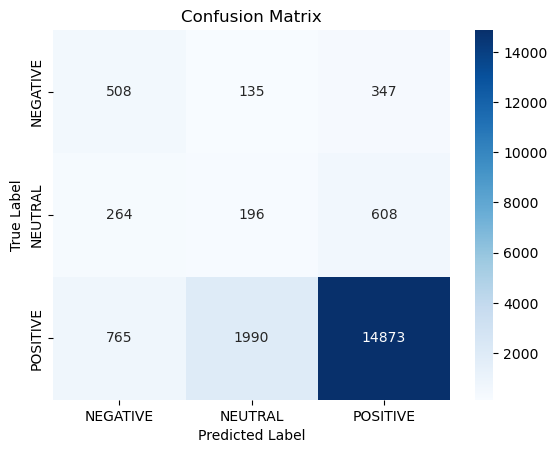

In [58]:
from sklearn.metrics import confusion_matrix

cm_vader = confusion_matrix(df_vader['label'], df_vader['predict_label'], labels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'])
sns.heatmap(cm_vader, annot=True, fmt="d", cmap="Blues", xticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'], yticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Textblob

In [59]:
from textblob import TextBlob

In [60]:
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from textblob import Word

nltk.download('stopwords')
nltk.download('punkt')

def preprocessing_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    #Tokenization
    text = word_tokenize(text)
    #Lemmatization
    text = [Word(word).lemmatize() for word in text]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]
    
    return " ".join(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rebecca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/rebecca/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [61]:
def clean_text_textblob(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

In [62]:
X_test_blob = X_test_raw.apply(preprocessing_text)
X_test_blob = X_test_blob.apply(clean_text_textblob)

In [63]:
df_textblob = pd.DataFrame({'cleaned_text': X_test_blob, 'label': y_test})

In [64]:
df_textblob.head()

,cleaned_text,label
21350,wonderful piece great price wonderful piece great price particularly wa lightning deal turned worked without problem wa happy receive rugged looking tool,POSITIVE
36808,five star work great,POSITIVE
43951,four star seems accurate legible definitely worth 4 star,POSITIVE
64801,five star ha best printer available box price point,POSITIVE
53494,one favorite color ha almost metallic flake look one favorite color ha almost metallic flake look really happy quality price,POSITIVE


In [65]:
df_textblob['polarity'] = df_textblob['cleaned_text'].astype(str).map(lambda text: TextBlob(text).sentiment.polarity)

df_textblob['review_len'] = df_textblob['cleaned_text'].astype(str).apply(len)
df_textblob['word_count'] = df_textblob['cleaned_text'].apply(lambda x: len(str(x).split()))

In [66]:
df_textblob['blob_sentiment_label'] = df_textblob['polarity'].apply(lambda x: 'POSITIVE' if x > 0.05 else ('NEGATIVE' if x < -0.05 else 'NEUTRAL'))

df_textblob[['label', 'cleaned_text', 'polarity', 'blob_sentiment_label']]

,label,cleaned_text,polarity,blob_sentiment_label
21350,POSITIVE,wonderful piece great price wonderful piece great price particularly wa lightning deal turned worked without problem wa happy receive rugged looking tool,0.761111,POSITIVE
36808,POSITIVE,five star work great,0.800000,POSITIVE
43951,POSITIVE,four star seems accurate legible definitely worth 4 star,0.300000,POSITIVE
64801,POSITIVE,five star ha best printer available box price point,0.700000,POSITIVE
53494,POSITIVE,one favorite color ha almost metallic flake look one favorite color ha almost metallic flake look really happy quality price,0.600000,POSITIVE
...,...,...,...,...
44106,POSITIVE,five star described,0.000000,NEUTRAL
51306,POSITIVE,really clean teeth noticeable difference new favorite toothbrush noticed difference right away using brush teeth get cleaner notice whiter started using highly recommend,0.289749,POSITIVE
32319,POSITIVE,work like charm delivered expected great homeproam chemist complaint,0.133333,POSITIVE
25366,POSITIVE,good quality giant shelf bracket two bracket received fine weld good sharp edge steel right thickness paint uniform titanium color neither home depot lowes sell bracket large wa glad find amazon box came wa ridiculously huge could held 30 bracket heck cardboard next time need giant heavyduty bracket ill know get,0.215972,POSITIVE


In [67]:
from sklearn.metrics import classification_report
report_textblob = classification_report(df_textblob['label'], df_textblob['blob_sentiment_label'],output_dict=True)
print(report_textblob)

{'NEGATIVE': {'precision': 0.2684563758389262, 'recall': 0.32323232323232326, 'f1-score': 0.2933088909257562, 'support': 990.0}, 'NEUTRAL': {'precision': 0.08324324324324324, 'recall': 0.21629213483146068, 'f1-score': 0.12021857923497267, 'support': 1068.0}, 'POSITIVE': {'precision': 0.9300846109803422, 'recall': 0.8293623780349444, 'f1-score': 0.8768404953968872, 'support': 17628.0}, 'accuracy': 0.7706491923194149, 'macro avg': {'precision': 0.42726141002083723, 'recall': 0.4562956120329094, 'f1-score': 0.43012265518587206, 'support': 19686.0}, 'weighted avg': {'precision': 0.8508689991987094, 'recall': 0.7706491923194149, 'f1-score': 0.8064468910645015, 'support': 19686.0}}


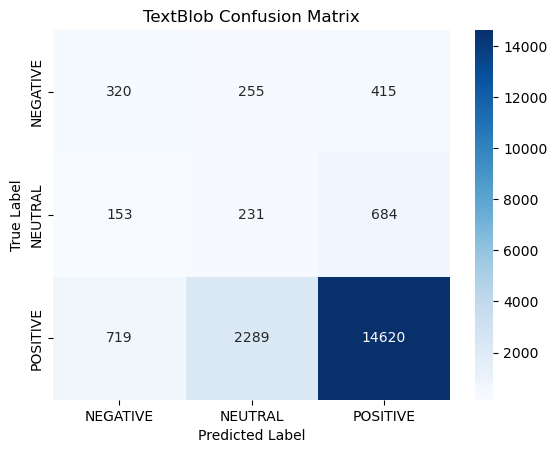

In [68]:
cm_textblob = confusion_matrix(df_textblob['label'], df_textblob['blob_sentiment_label'], labels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'])
sns.heatmap(cm_textblob, annot=True, fmt="d", cmap="Blues", xticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'], yticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("TextBlob Confusion Matrix")
plt.show()

# Machine Learning

In [69]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

X_train_preprocessing = X_train_raw.apply(preprocessing_text)
X_train_clean = X_train_preprocessing.apply(clean_text_textblob)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train_clean)
X_test_tfidf = tfidf.transform(X_test_blob)

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [100]:
model_svm = SVC(kernel="linear", class_weight='balanced')

In [101]:
model_svm.fit(X_train_tfidf, y_train_num)
y_pred_svm = model_svm.predict(X_test_tfidf)
report_svm = classification_report(y_test_num, y_pred_svm, output_dict=True)

cm_svm = confusion_matrix(y_test_num, y_pred_svm)

acc_svm = accuracy_score(y_test_num, y_pred_svm)
precision_svm = precision_score(y_test_num, y_pred_svm, average='weighted', zero_division=0)
recall_svm = recall_score(y_test_num, y_pred_svm, average='weighted', zero_division=0)       
f1_svm = f1_score(y_test_num, y_pred_svm, average='weighted', zero_division=0)

### MLP

In [88]:
model_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
model_mlp.fit(X_train_tfidf, y_train_num)

y_pred_mlp = model_mlp.predict(X_test_tfidf)

report_mlp = classification_report(y_test_num, y_pred_mlp, output_dict=True)

cm_mlp = confusion_matrix(y_test_num, y_pred_mlp)
acc_mlp = accuracy_score(y_test_num, y_pred_mlp)
precision_mlp = precision_score(y_test_num, y_pred_mlp, average='weighted', zero_division=0)
recall_mlp = recall_score(y_test_num, y_pred_mlp, average='weighted', zero_division=0)        

### Compare

In [93]:
# {0: "NEGATIVE", 1: "NEUTRAL", 2: "POSITIVE"}
inv_label_mapping = {v: k for k, v in label_mapping.items()}

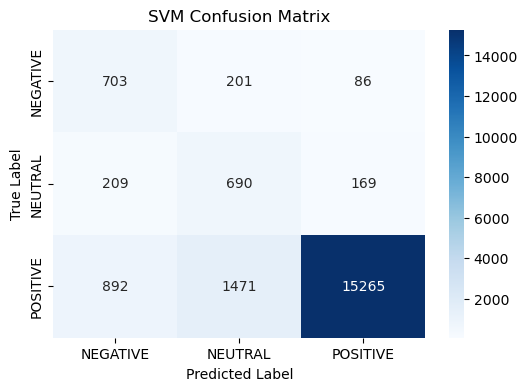

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = sorted(inv_label_mapping.keys())
string_labels = [inv_label_mapping[i] for i in labels]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=string_labels,
            yticklabels=string_labels)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

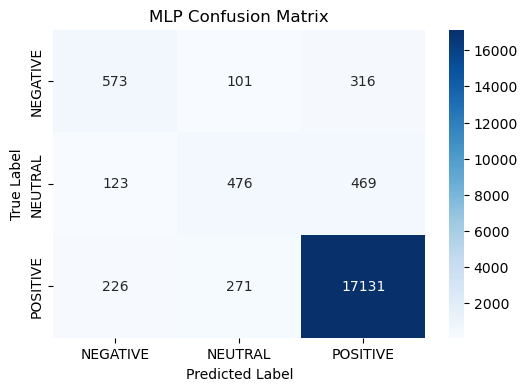

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues',
            xticklabels=string_labels,
            yticklabels=string_labels)
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [103]:
import pandas as pd

mlp_scores = {
    "Model": "MLP",
    "Accuracy": acc_mlp,
    "Precision": precision_mlp,
    "Recall": recall_mlp,
    "F1 Score": report_mlp["weighted avg"]["f1-score"]
}

svm_scores = {
    "Model": "SVM",
    "Accuracy": acc_svm,
    "Precision": precision_svm,
    "Recall": recall_svm,
    "F1 Score": report_svm["weighted avg"]["f1-score"]
}

# DataFrame
df_scores = pd.DataFrame([mlp_scores, svm_scores])


df_scores

,Model,Accuracy,Precision,Recall,F1 Score
0,MLP,0.923499,0.917930,0.923499,0.920259
1,SVM,0.846185,0.916192,0.846185,0.871870


### LinearSVM

In [105]:
from sklearn.svm import LinearSVC
model_l_svm = LinearSVC()
model_l_svm.fit(X_train_tfidf, y_train_num)

y_pred_l_svm = model_l_svm.predict(X_test_tfidf)

report_l_svm = classification_report(y_test_num, y_pred_l_svm, output_dict=True)

cm_l_svm = confusion_matrix(y_test_num, y_pred_l_svm)
acc_l_svm = accuracy_score(y_test_num, y_pred_l_svm)
precision_l_svm = precision_score(y_test_num, y_pred_l_svm, average='weighted', zero_division=0)
recall_l_svm = recall_score(y_test_num, y_pred_l_svm, average='weighted', zero_division=0)   

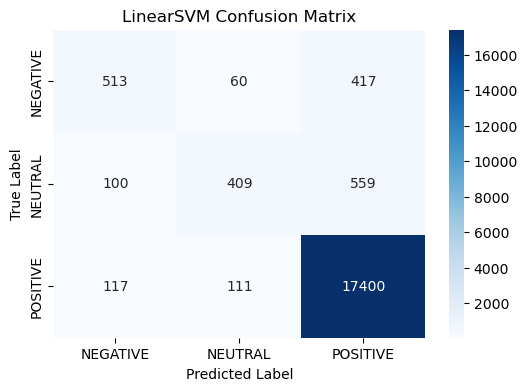

In [106]:
labels = sorted(inv_label_mapping.keys())
string_labels = [inv_label_mapping[i] for i in labels]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_l_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=string_labels,
            yticklabels=string_labels)
plt.title("LinearSVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [108]:
mlp_scores = {
    "Model": "MLP",
    "Accuracy": acc_mlp,
    "Precision": precision_mlp,
    "Recall": recall_mlp,
    "F1 Score": report_mlp["weighted avg"]["f1-score"]
}

svm_scores = {
    "Model": "SVM",
    "Accuracy": acc_svm,
    "Precision": precision_svm,
    "Recall": recall_svm,
    "F1 Score": report_svm["weighted avg"]["f1-score"]
}

l_svm_scores = {
    "Model": "LinearSVM",
    "Accuracy": acc_l_svm,
    "Precision": precision_l_svm,
    "Recall": recall_l_svm,
    "F1 Score": report_l_svm["weighted avg"]["f1-score"]
}

# DataFrame
df_scores_3 = pd.DataFrame([mlp_scores, svm_scores, l_svm_scores])


df_scores_3

,Model,Accuracy,Precision,Recall,F1 Score
0,MLP,0.923499,0.917930,0.923499,0.920259
1,SVM,0.846185,0.916192,0.846185,0.871870
2,LinearSVM,0.930712,0.921496,0.930712,0.922441
